<a href="https://colab.research.google.com/github/InesAnindiyta/strukturdata/blob/main/dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

instalasi library

In [ ]:
!pip install networkx matplotlib

struktur data graf dan algoritma

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('infinity') for node in graph}
    previous = {node: None for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous

fungsi untuk merekontruksi jalur

In [ ]:
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

visualisasi dengan networkx dan matplotlib

In [ ]:
def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        G.add_node(node)
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    edge_colors = ['red' if (u, v) in zip(path, path[1:]) else 'black' for u, v in G.edges()]
    node_colors = ['red' if node in path else 'skyblue' for node in G.nodes()]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, node_size=2000)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Visualisasi Graf dengan Jalur Terpendek")
    plt.axis('off')
    plt.show()

penggunaan lengkap

Jarak dari A ke Z: ['A', 'B', 'D', 'E', 'Z']
Jalur: A -> B -> D -> E -> Z


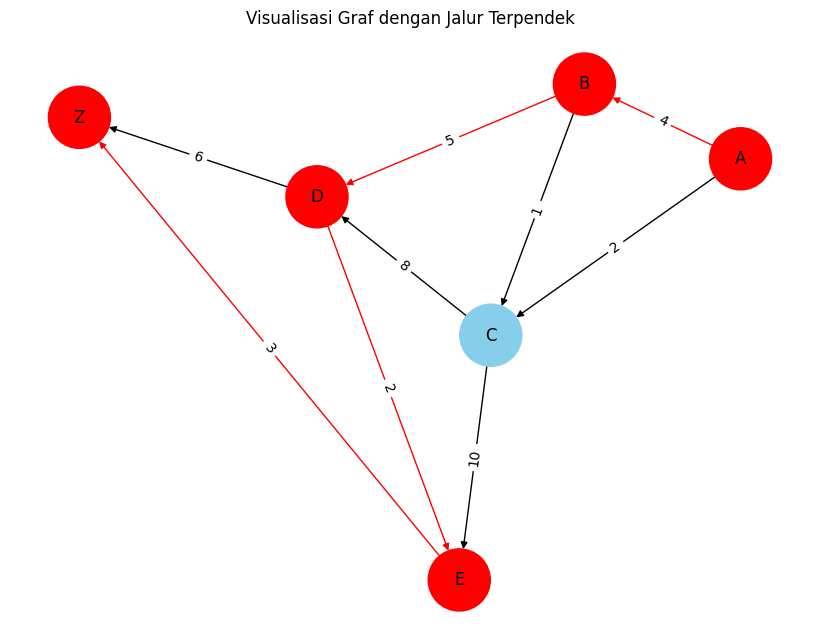

In [ ]:
# definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z':3},
    'Z':{}
}

#jalankan dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

#rekonstruksi jalur terpendek
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {shortest_path}")
print(f"Jalur: {' -> '.join(shortest_path)}")

#visualisasi graf dan jalur terpendek
visualize_graph(graph, shortest_path)

tugas

Jarak terpendek: 14
Jalur: A -> B -> D -> E -> Z


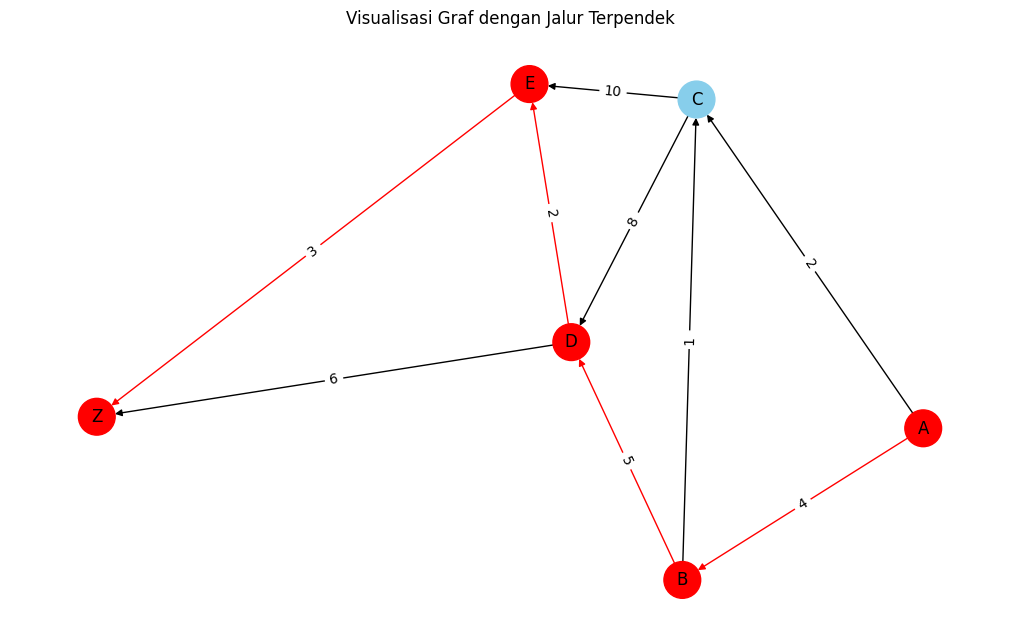

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('infinity') for node in graph}
    previous = {node: None for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous

def get_path(previous, end_node):
    path = []
    current = end_node
    while current is not None:
        path.insert(0, current)
        current = previous[current]
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    # Tambahkan node dan edge
    for node in graph:
        G.add_node(node)
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Warna khusus untuk path
    edge_colors = ['red' if (u, v) in zip(path, path[1:]) else 'black' for u, v in G.edges()]
    node_colors = ['red' if node in path else 'skyblue' for node in G.nodes()]

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, node_size=700)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Visualisasi Graf dengan Jalur Terpendek")
    plt.show()

# Contoh penggunaan
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)
shortest_path = get_path(previous, end_node)

print(f"Jarak terpendek: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")

visualize_graph(graph, shortest_path)